In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
import os

os.chdir('/content/gdrive/My Drive/Kaggle/Titanic Machine Learning from Disaster')

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn import neighbors, svm

In [0]:
train = pd.read_csv('Dataset/train.csv')
test =  pd.read_csv('Dataset/test.csv')

In [73]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [76]:
train.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

In [77]:
test.isnull().any()

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare         True
Embarked    False
dtype: bool

In [0]:
train.replace('male', 0, inplace=True)
train.replace('female', 1, inplace=True)
train.replace('Q', 0, inplace=True)
train.replace('S', 1, inplace=True)
train.replace('C', 2, inplace=True)

test.replace('male', 0, inplace=True)
test.replace('female', 1, inplace=True)
test.replace('Q', 0, inplace=True)
test.replace('S', 1, inplace=True)
test.replace('C', 2, inplace=True)

train.fillna(value=-99999, inplace=True)
test.fillna(value=-99999, inplace=True)


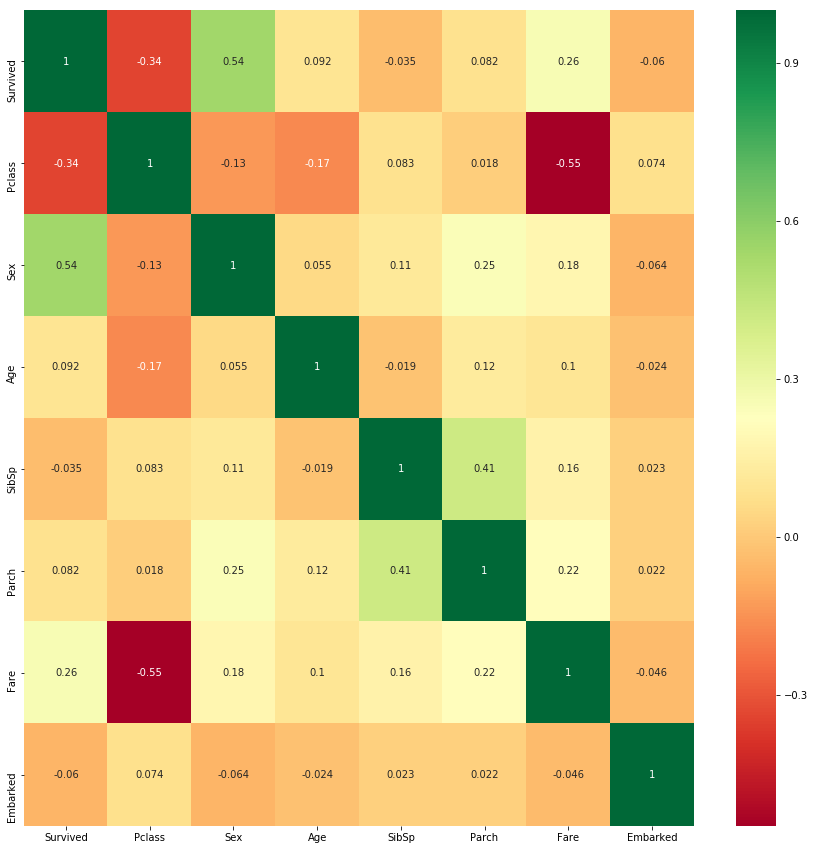

In [122]:
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
X_train = train.drop(['Survived', 'Pclass', 'SibSp', 'Embarked'], axis=1)
y_train = train['Survived']

X_test = test.drop(['Pclass', 'SibSp', 'Embarked'], axis=1)


In [0]:
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)

bbc.fit(X_train, y_train)

results = bbc.predict(X_test)
results = pd.Series(results,name="Survived")

submission = pd.concat([pd.Series(range(892,1310),name = "PassengerId"),results],axis = 1)
submission.to_csv("titanic.csv",index=False)